In [1]:
import pandas as pd
import time
import matplotlib.pyplot as plt

Загрузка данных из csv Market_Basket_Optimisation

In [2]:
df = pd.read_csv('Market_Basket_Optimisation.csv')

In [3]:
df.head()

,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
0,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,low fat yogurt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Гистограммы относительной и фактической частоты встречаемости для 20 наиболее популярных товаров

Относительная частота

<AxesSubplot:>

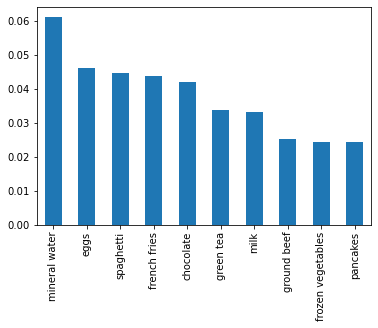

In [4]:
df.stack().value_counts(normalize=True).sort_values(ascending=False)[:10].plot(kind='bar')

Фактическая частота

<AxesSubplot:>

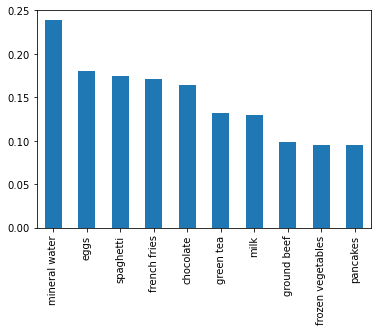

In [5]:
df.stack().value_counts().sort_values(ascending=False)[:10].apply(lambda item: item / df.shape[0]).plot(kind='bar')

Сформируем список транзакций, выведем первый элемент и первый список

In [6]:
transations = []
for i in range(df.shape[0]):
    row = df.iloc[i].dropna().tolist()
    transations.append(row)

In [7]:
transations[0][0]

'burgers'

In [8]:
transations[0]

['burgers', 'meatballs', 'eggs']

Воспользуемся библиотекой apriori_python

In [9]:
!pip3 install apriori-python

In [10]:
from apriori_python import apriori

In [11]:
t = []
start = time.perf_counter()

t1, rules = apriori(transations, minSup=0.05, minConf = 0.1)
time1 = time.perf_counter() - start
t.append(time1)

In [12]:
rules

[[{'mineral water'}, {'eggs'}, 0.21376608841634023],
 [{'mineral water'}, {'chocolate'}, 0.22104085058757694],
 [{'mineral water'}, {'spaghetti'}, 0.2506994963626189],
 [{'eggs'}, {'mineral water'}, 0.28338278931750743],
 [{'chocolate'}, {'mineral water'}, 0.3213995117982099],
 [{'spaghetti'}, {'mineral water'}, 0.3430321592649311]]

Воспользуемся библиотекой apyori

In [13]:
!pip3 install apyori

In [14]:
from apyori import apriori as apy_apriori

In [15]:
start = time.perf_counter()

rules = apy_apriori(transactions=transations,
min_support=0.05, min_confidence=0.1,
min_lift=1.0001)
results = list(rules)
time2 = (time.perf_counter() - start)
t.append(time2)

In [16]:
results

[RelationRecord(items=frozenset({'mineral water', 'chocolate'}), support=0.05266666666666667, ordered_statistics=[OrderedStatistic(items_base=frozenset({'chocolate'}), items_add=frozenset({'mineral water'}), confidence=0.32139951179820997, lift=1.3489067367020564), OrderedStatistic(items_base=frozenset({'mineral water'}), items_add=frozenset({'chocolate'}), confidence=0.22104085058757697, lift=1.3489067367020564)]),
 RelationRecord(items=frozenset({'mineral water', 'eggs'}), support=0.05093333333333333, ordered_statistics=[OrderedStatistic(items_base=frozenset({'eggs'}), items_add=frozenset({'mineral water'}), confidence=0.28338278931750743, lift=1.1893513821383916), OrderedStatistic(items_base=frozenset({'mineral water'}), items_add=frozenset({'eggs'}), confidence=0.21376608841634023, lift=1.1893513821383916)]),
 RelationRecord(items=frozenset({'mineral water', 'spaghetti'}), support=0.05973333333333333, ordered_statistics=[OrderedStatistic(items_base=frozenset({'mineral water'}), ite

In [17]:
for result in results:
    for subset in result[2]:
        print(subset[0], subset[1])
        print("Support: {0}; Confidence: {1}; Lift: {2};". format(result[1], subset[2], subset[3]))
        print()

frozenset({'chocolate'}) frozenset({'mineral water'})
Support: 0.05266666666666667; Confidence: 0.32139951179820997; Lift: 1.3489067367020564;

frozenset({'mineral water'}) frozenset({'chocolate'})
Support: 0.05266666666666667; Confidence: 0.22104085058757697; Lift: 1.3489067367020564;

frozenset({'eggs'}) frozenset({'mineral water'})
Support: 0.05093333333333333; Confidence: 0.28338278931750743; Lift: 1.1893513821383916;

frozenset({'mineral water'}) frozenset({'eggs'})
Support: 0.05093333333333333; Confidence: 0.21376608841634023; Lift: 1.1893513821383916;

frozenset({'mineral water'}) frozenset({'spaghetti'})
Support: 0.05973333333333333; Confidence: 0.2506994963626189; Lift: 1.4396984860027884;

frozenset({'spaghetti'}) frozenset({'mineral water'})
Support: 0.05973333333333333; Confidence: 0.3430321592649311; Lift: 1.4396984860027886;



Воспользуемся библиотекой efficient_apriori

In [18]:
!pip3 install efficient-apriori

In [19]:
from efficient_apriori import apriori as eff_apriori

In [20]:
start = time.perf_counter()
itemsets, rules = eff_apriori(transations, min_support = 0.05, min_confidence = 0.1)
time3 = time.perf_counter() - start
t.append(time3)

In [21]:
for i in range(len(rules)):
    print(rules[i])

{mineral water} -> {chocolate} (conf: 0.221, supp: 0.053, lift: 1.349, conv: 1.073)
{chocolate} -> {mineral water} (conf: 0.321, supp: 0.053, lift: 1.349, conv: 1.123)
{mineral water} -> {eggs} (conf: 0.214, supp: 0.051, lift: 1.189, conv: 1.043)
{eggs} -> {mineral water} (conf: 0.283, supp: 0.051, lift: 1.189, conv: 1.063)
{spaghetti} -> {mineral water} (conf: 0.343, supp: 0.060, lift: 1.440, conv: 1.159)
{mineral water} -> {spaghetti} (conf: 0.251, supp: 0.060, lift: 1.440, conv: 1.102)


Применим алгоритм FP-Growth

In [22]:
!pip3 install fpgrowth-py

In [23]:
from fpgrowth_py import fpgrowth

In [24]:
start = time.perf_counter()
itemsets, rules = fpgrowth(transations, minSupRatio=0.05, minConf=0.1)
time4 = time.perf_counter() - start
t.append(time4)

In [25]:
for i in range(len(rules)):
    print(rules[i])

[{'mineral water'}, {'chocolate'}, 0.22104085058757694]
[{'chocolate'}, {'mineral water'}, 0.3213995117982099]
[{'spaghetti'}, {'mineral water'}, 0.3430321592649311]
[{'mineral water'}, {'spaghetti'}, 0.2506994963626189]
[{'mineral water'}, {'eggs'}, 0.21376608841634023]
[{'eggs'}, {'mineral water'}, 0.28338278931750743]


Сравним время выполнения наших алгоритмов

Время выполнения apriori:  1.4711626000007527 

Время выполнения apriori 2:  0.05626699999993434 

Время выполнения efficient_apriori:  0.03515900000093097 

Время выполнения fpgrowth:  0.5244707000001654 



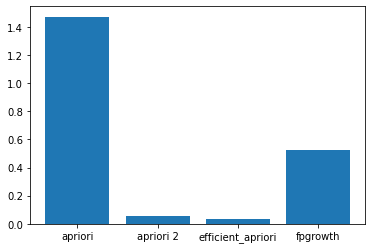

In [26]:
print('Время выполнения apriori: ', t[0], '\n')
print('Время выполнения apriori 2: ', t[1], '\n')
print('Время выполнения efficient_apriori: ', t[2], '\n')
print('Время выполнения fpgrowth: ', t[3], '\n')
plt.bar(['apriori','apriori 2','efficient_apriori','fpgrowth'],t)
plt.show()